In [1]:
import pandas as pd

In [2]:
! pip install Langgraph Langsmith

In [3]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages



#### StateGraph = Flowchart builder for your AI agent’s brain.
#### TypedDict = This tell Python "This dictionary should have specific keys, and each key should have a specific type."
#### Annotated – adds extra info to a type
#### add_messages tells LangGraph how to combine a new message list with the existing one (it appends instead of overwriting)

In [4]:
class State(TypedDict):
  messages: Annotated[list,add_messages]

graph_builder = StateGraph(State)

 messages: Annotated[list, add_messages] = It has one key "messages" whose value is a list. The Annotated bit attaches add_messages as the “merge strategy.”

So the State is a dictionary which  have a key called "messages"
whose value is a list
and that list should be merged using add_messages (append new messages to existing)

graph_builder = StateGraph(State) | Creates a new graph, telling it “this is the state schema we’ll be passing around.

A reducer function is a rule that tells how to update the state when a node in the graph returns new data for a field.

In LangGraph:

Your state is a dictionary (like memory)

Each key in the state can have a reducer

A reducer function tells LangGraph how to merge or combine new values with the existing state

## Very Imp

When defining a graph, the first step is to define its State. The State includes the graph's schema and reducer functions that handle state updates. In our example, State is a TypedDict with one key: messages. The add_messages reducer function is used to append new messages to the list instead of overwriting it. Keys without a reducer annotation will overwrite previous values

In [5]:
from dotenv import load_dotenv
import os


load_dotenv()   #ts job is to load environment variables from a .env file into your Python program's environment.
Langgraph_API = os.getenv("LANGGRAPH_API_KEYS")

#getenv is not a built‑in Python function—it lives inside the os module,so always use os.getenv() to access environment variables.



os stands for the Operating System interface module in Python.
It is a built-in Python module that lets you interact with your computer’s operating system — such as:

Accessing environment variables (os.getenv)

Reading/writing files and paths

Managing directories

Running shell commands

So os here is your Python interface to your machine’s environment.

In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model = "gemini-1.5-flash")

In [7]:
def chatbot(state : State) :
    return {"messages" : [llm.invoke(state["messages"])]}
            
graph_builder.add_node("chatbot_v1",chatbot)   
graph_builder.add_edge(START,"chatbot_v1")   
graph_builder.add_edge("chatbot_v1",END)

graph = graph_builder.compile()

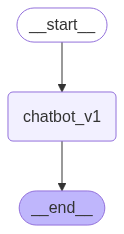

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [9]:
# ----------------------------------------
# 1) Function: send a user message to the graph
#    and print every assistant reply as it arrives
# ----------------------------------------
def chat_once(user_text: str):
    # Build the first state: a single user message
    start_state = {"messages": [{"role": "user", "content": "Who is Prime Minister of India"}]}

    # Run the graph in streaming mode
    for update in graph.stream(start_state):
        # Each update may contain outputs from one or more nodes
        for node_output in update.values():
            # Print only the newest assistant message
            last_msg = node_output["messages"][-1]
            print("Assistant:", last_msg.content)


# ----------------------------------------
# 2) Simple REPL (Read–Eval–Print Loop)
#    Type → get answer → repeat until “quit”
# ----------------------------------------
print('Type "quit" to exit.\n')

while True:
    user_text = input("User: ").strip()

    # Leave the loop if the user asked to quit
    if user_text.lower() in {"quit", "exit", "q"}:
        print("Goodbye!")
        break

    # Send the message through the graph
    chat_once(user_text)


Type "quit" to exit.

Goodbye!


Practising

In [1]:
! pip install langchain langgrapg langsmith

ERROR: Could not find a version that satisfies the requirement langgrapg (from versions: none)
ERROR: No matching distribution found for langgrapg


In [2]:
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from typing import Annotated
from typing_extensions import TypedDict

In [3]:
from dotenv import load_dotenv
import os
load_dotenv()   #ts job is to load environment variables from a .env file into your Python program's environment.
os.getenv("LANGGRAPH_API_KEYS")

'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'

In [4]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model = "gpt-3.5-turbo")

In [5]:
llm.invoke("Who is Prime Minister of India?").content

'As of October 2021, Narendra Modi is the Prime Minister of India.'

In [6]:
# now built schema  of the chatbot
class State(TypedDict):
    messages :Annotated[list,add_messages]

graph_builder = StateGraph(State)


In [7]:
def Biva(state :State):
    return {"messages" : [llm.invoke(state["messages"])]}

graph_builder.add_node("Biva",Biva) #one is a label, the other is the function that powers that label.
graph_builder.add_edge(START,"Biva")
graph_builder.add_edge("Biva",END)
graph_1 = graph_builder.compile()

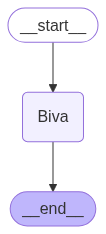

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph_1.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
# now define a function where message will be given and output will be taken from the chatbot


In [ ]:
def CS(messages:str):
    start_states = {"messages" : [{"role":"user","content": "who ic chief minister of Jharkhand?"}]}
    
    for updates in graph_1.stream(start_states):
        for node_output in updates.values():
            last_msg = node_output["messages"][-1]
            print("Assistant:", last_msg.content)

print('Type "quit" to exit.\n')
while True:
    user_text = input("User: ").strip()

    # Leave the loop if the user asked to quit
    if user_text.lower() in {"quit", "exit", "q"}:
        print("Goodbye!")
        break

    # Send the message through the graph
    CS(user_text)            
 #CS Handles user input and runs the graph in a loop

Type "quit" to exit.

Assistant: As of September 2021, Hemant Soren is the Chief Minister of Jharkhand.
Goodbye!
